In [1]:
%load_ext autoreload
%autoreload 2
import os
from cnbpy.datalad import Dataset,Subject,Abide_Subject,Abide_Dataset
from cnbpy.bids import BIDS
from cnbpy.fmriprep import FMRIPREP

import cortex

from cnbpy.mulisensory import sensory_dm
import numpy as np

It is highly recommended to configure Git before using DataLad. Set both 'user.name' and 'user.email' configuration variables.
It is highly recommended to configure Git before using DataLad. Set both 'user.name' and 'user.email' configuration variables.


Pycortex is installed and imported


In [51]:
Dset.list_fmriprepped_subjects()

In [53]:
len(Dset.fmriprepped_subs)

732

In [2]:
local_path='/storage/basic/nh_leverhulme/scratchpad'

Dset=Abide_Dataset(local_path)

In [3]:
msub=Abide_Subject(Dset,'50047')

In [59]:
msub.make_fmriprep_dataset()
jeff=msub.load_fmriprep_outcomes(1,1)

In [50]:
msub.show_report(msub.fmriprep_report)

<IPython.core.display.Javascript object>

In [86]:
jeff.shape

(20484, 200)

In [16]:
import nibabel as nib


/home/users/yg916972/.conda/envs/p3env/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: get_metadata method deprecated. Use the metadata property instead.2.1

* deprecated from version: 4.0
  """Entry point for launching an IPython kernel.


In [12]:
confounds=msub.load_fmriprep_confounds(2,1)

In [60]:
from cnbpy.preproc import PCA_denoiser

In [61]:
DN=PCA_denoiser(confounds,jeff)

In [62]:
from cnbpy.utils import load_pkg_yaml

In [63]:
DN.subset_frame(load_pkg_yaml()['denoise']['denoisevars'])
DN.prepare_frame()
DN.PCA_regression(ncomps=load_pkg_yaml()['denoise']['ncomps'])

/home/users/yg916972/Software/cnbpy/cnbpy/preproc.py:127: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  
/home/users/yg916972/Software/cnbpy/cnbpy/preproc.py:133: RuntimeWarning: invalid value encountered in true_divide
  


In [64]:
from cnbpy.preproc import sg_filter

In [65]:
filt=sg_filter(DN.denoised_data,window_length=DN.denoised_data.shape[-1])

In [66]:
mydm=sensory_dm(msub)
mydm.prepare_out_dirs('MYAN')

In [67]:
mydm.make_subsurfaces()

In [68]:
mydm.make_dm(np.nan_to_num(DN.denoised_data))

In [69]:
mydm.prep_pipeline(ksplits=int(5))

In [70]:
mydm.fit(np.nan_to_num(DN.denoised_data.T))

[........................................] 100% | 116.70 sec | 20 random sampling with cv | 


In [71]:
mydm.get_params()

/home/users/yg916972/.conda/envs/p3env/lib/python3.6/site-packages/himalaya/scoring.py:151: UserWarning: y_true has to be zero-mean over samples to compute the split r2 scores.
  'the split r2 scores.', UserWarning)


In [72]:
mydm.out_npy_wildcard='{param}.npy'

In [73]:
mydm.save_outcomes()

In [74]:
mydm.load_lookups()
mydm.reconstruct_profiles()
mydm.splice_lookups()

/home/users/yg916972/Software/cnbpy/cnbpy/mulisensory.py:621: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  betas = np.linalg.lstsq(dm, profiles.T)[0]
/home/users/yg916972/Software/cnbpy/cnbpy/mulisensory.py:673: RuntimeWarning: invalid value encountered in true_divide
  wav=dp/summed_weights


In [45]:
np.nanmin(mydm.spliced_lookups[1]['inflated_dist_somato'])

38.32576782976747

In [75]:
from cnbpy.pycortex_vis import basic_plot

In [48]:
mydm.prepare_frame()

yo


FileNotFoundError: [Errno 2] No such file or directory: '/storage/basic/nh_leverhulme/ABIDE/MYAN/csvs/50047/test_scores.npy'

In [ ]:
bp=basic_plot(mydm.spliced_lookups[1]['inflated_dist_somato'],subject='fsaverage5',cmap='nipy_spectral',vmin=38,vmax=65)

In [77]:
mydm.spliced_lookups[0]

,prf_eccentricity_visual,prf_polar_angle_visual,hempref_diff_visual,hempref_peak_visual
0,0.240763,-141.708590,3.658098e-17,1.0
1,1.740347,160.225920,-7.395483e-18,0.0
2,0.240763,-141.708590,6.603730e-17,1.0
3,0.240763,-141.708590,1.305767e-17,1.0
4,7.802026,179.095980,3.639878e-17,1.0
...,...,...,...,...
20479,7.802026,179.095980,2.869410e-17,1.0
20480,7.786374,89.249330,-1.043333e-17,1.0
20481,7.802026,179.095980,4.594015e-18,1.0
20482,7.922712,79.209410,-2.724859e-17,1.0


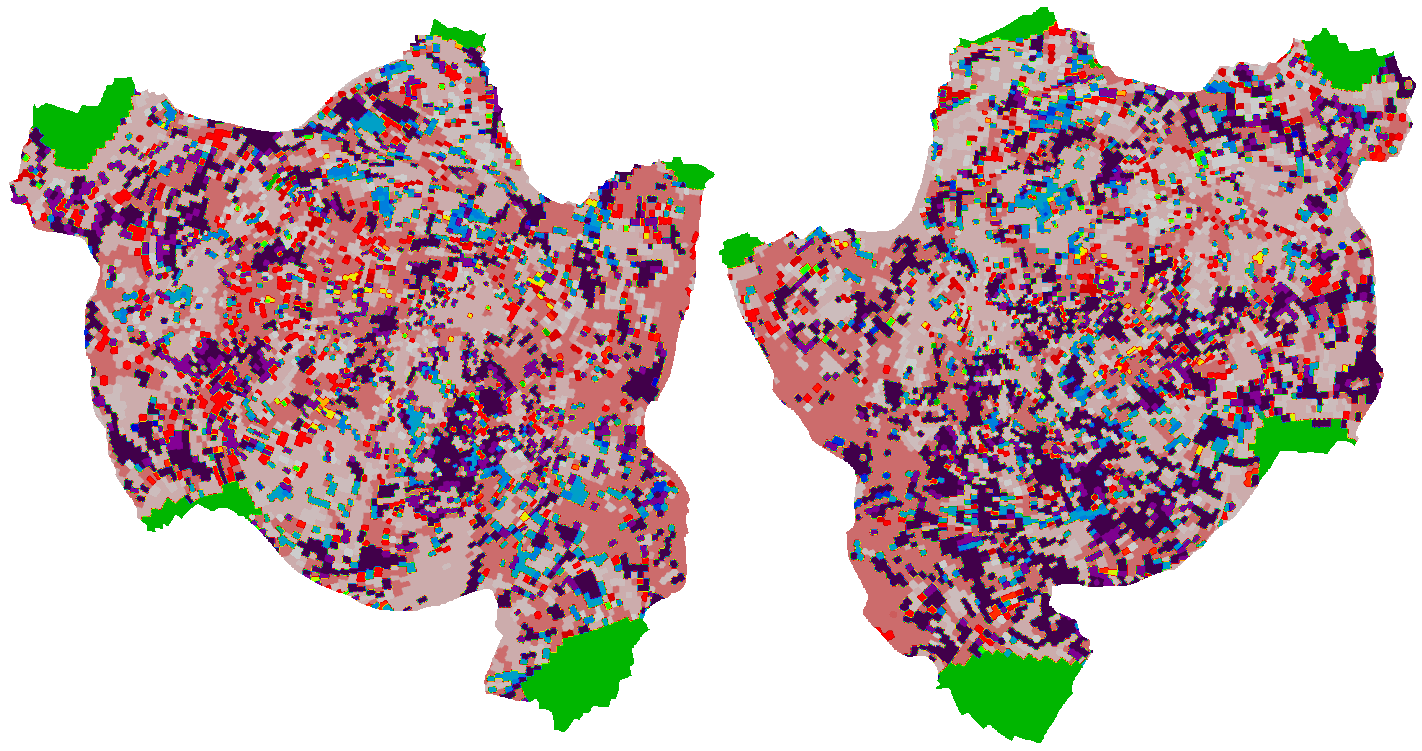

In [78]:
bp=basic_plot(mydm.spliced_lookups[0]['prf_eccentricity_visual'],subject='fsaverage5',cmap='nipy_spectral',vmin=0,vmax=8)